In [3]:
# Importing dataset and view as dataframe (table)
import pandas as pd

df = pd.read_csv('../Dataset/spotify_2023_v2.csv')
df

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,2022,11,3,953,0,91473363,61,13,37,...,144,A,Major,60,24,39,57,0,8,3
948,1,2022,10,21,1180,0,121871870,4,0,8,...,166,F#,Major,42,7,24,83,1,12,6
949,2,2022,11,3,573,0,73513683,2,0,7,...,92,C#,Major,80,81,67,4,0,8,6
950,3,2022,10,20,1320,0,133895612,29,26,17,...,97,C#,Major,82,67,77,8,0,12,5


<Axes: xlabel='bpm', ylabel='streams'>

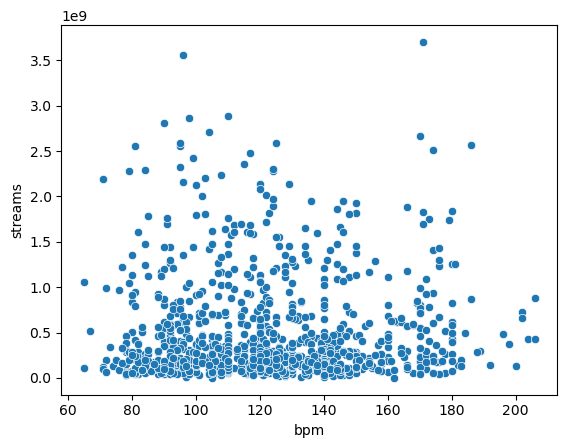

In [4]:
# View dataset value to analyze bpm (Beats per minute, a measure of song tempo) and Streams (Total number of streams on Spotify)
import seaborn as sb

sb.scatterplot(data=df, x = 'bpm', y = 'streams')

In [5]:
# Create Elbow Method Function
from sklearn.cluster import KMeans

def find_kmeans(data, max_k):
  # create variable
  means = []
  distance = []

  for k in range(1, max_k):
    # running k-means
    kmeans = KMeans(n_clusters = k, n_init = 'auto')
    kmeans.fit(data)

    # insert result from k-means into variable
    means.append(k)
    distance.append(kmeans.inertia_)

  # return as chart
  chart = sb.lineplot(x=means, y=distance)
  chart.set(xlabel='K Values', ylabel='Distance')

C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

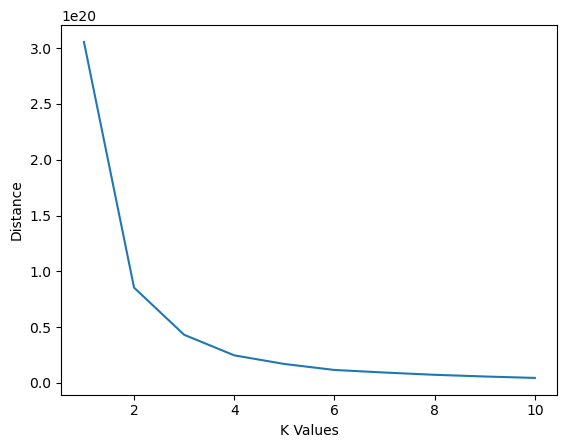

In [6]:
# Call the fuction to determine the optimal number of clusters
find_kmeans(df[['bpm', 'streams']], 11)

In [7]:
# Based on the graph before, we can assume that start from 2 clusters, it will give us best k values
# So, I just gonna show u from 2 until 5 clusters because if we add more than 5, it will not very different based on the k point and observed data Distance 
# insert and show all of the best k values collumn to dataframe
x_col = 'bpm'
y_col = 'streams'

for k in range(2, 6):
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df[[x_col, y_col]])
  df[f'kmeans_{k}'] = kmeans.labels_

df

C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,kmeans_2,kmeans_3,kmeans_4,kmeans_5
0,2,2023,7,14,553,147,141381703,43,263,45,...,89,83,31,0,8,4,0,2,1,3
1,1,2023,3,23,1474,48,133716286,48,126,58,...,61,74,7,0,10,4,0,2,1,3
2,1,2023,6,30,1397,113,140003974,94,207,91,...,32,53,17,0,31,6,0,2,1,3
3,1,2019,8,23,7858,100,800840817,116,207,125,...,58,72,11,0,11,15,0,0,3,4
4,1,2023,5,18,3133,50,303236322,84,133,87,...,23,80,14,63,11,6,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1,2022,11,3,953,0,91473363,61,13,37,...,24,39,57,0,8,3,0,2,1,3
948,1,2022,10,21,1180,0,121871870,4,0,8,...,7,24,83,1,12,6,0,2,1,3
949,2,2022,11,3,573,0,73513683,2,0,7,...,81,67,4,0,8,6,0,2,1,3
950,3,2022,10,20,1320,0,133895612,29,26,17,...,67,77,8,0,12,5,0,2,1,3


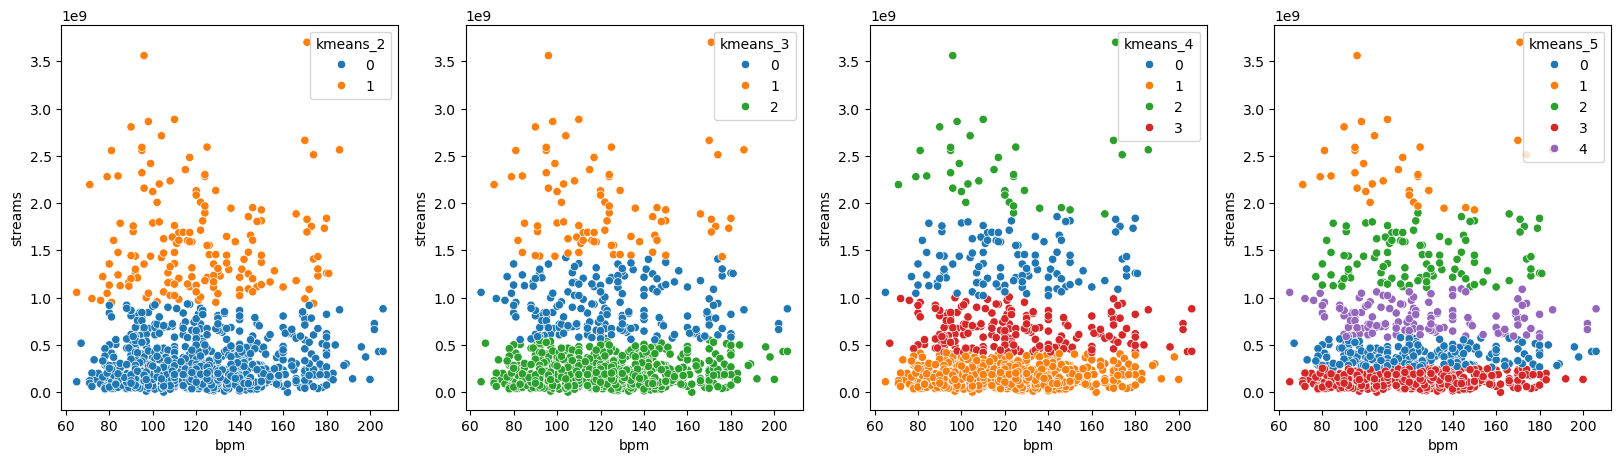

In [8]:
# And the last, we will show the graph for each Optimal K-Values
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[20, 5])

for k in range (2, 6):
  sb.scatterplot(data=df, x=x_col, y=y_col, hue=df[f'kmeans_{k}'], ax=axes[k-2], palette='tab10')